In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [9]:
df.drop(['User ID'], axis = 1, inplace = True)

In [10]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.375, 70.375)

In [11]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

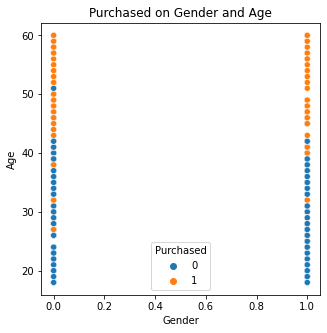

In [12]:
#EDA
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Gender', y = 'Age', hue = 'Purchased', data = df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Purchased on Gender and Age')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 80)
     

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
     

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
     

KNeighborsClassifier()

In [16]:
knn.score(X_train, y_train)

0.9214285714285714

In [17]:
knn.score(X_test, y_test)
     

0.9

In [20]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
for i in range(1,40) :
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print('K - Value : ', i, 'Train Score : ', knn.score(X_train, y_train), 'cv score : ',np.mean(cross_val_score(knn, X_train, y_train)))

K - Value :  1 Train Score :  1.0 cv score :  0.8607142857142858
K - Value :  2 Train Score :  0.9285714285714286 cv score :  0.85
K - Value :  3 Train Score :  0.9285714285714286 cv score :  0.9035714285714285
K - Value :  4 Train Score :  0.9214285714285714 cv score :  0.8964285714285714
K - Value :  5 Train Score :  0.9214285714285714 cv score :  0.9142857142857144
K - Value :  6 Train Score :  0.9178571428571428 cv score :  0.9107142857142858
K - Value :  7 Train Score :  0.9214285714285714 cv score :  0.9178571428571429
K - Value :  8 Train Score :  0.9214285714285714 cv score :  0.925
K - Value :  9 Train Score :  0.9178571428571428 cv score :  0.9214285714285715
K - Value :  10 Train Score :  0.9214285714285714 cv score :  0.925
K - Value :  11 Train Score :  0.9214285714285714 cv score :  0.9214285714285715
K - Value :  12 Train Score :  0.925 cv score :  0.9
K - Value :  13 Train Score :  0.925 cv score :  0.9
K - Value :  14 Train Score :  0.925 cv score :  0.8892857142857142

In [21]:
knn = KNeighborsClassifier(10) 
knn.fit(X_train, y_train)
     

KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.score(X_train, y_train)

0.9214285714285714

In [23]:
knn.score(X_test, y_test)
     

0.9

In [24]:
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve, confusion_matrix
y_predict = knn.predict(X_test)
f1_score(y_test, y_predict)

0.8536585365853658

In [25]:
confusion_matrix(y_test, y_predict)

array([[73,  6],
       [ 6, 35]], dtype=int64)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


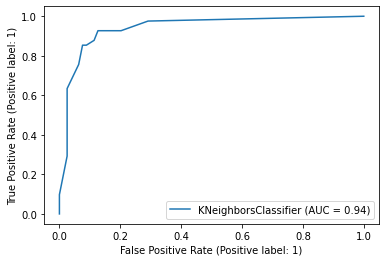

In [26]:
plot_roc_curve(knn, X_test, y_test)
     